<a href="https://colab.research.google.com/github/salwaadalla/stock-clustering-analysis/blob/main/Stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock data:


### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

from sklearn.preprocessing import StandardScaler

from scipy.spatial.distance import cdist, pdist

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/stock_data (1).csv')

In [ ]:
df = data.copy()

In [ ]:
df.head(6)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831


In [ ]:
df.shape

(340, 15)

* There is 340 rows and 15 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* Ticker symbol, Security, GICS sector and GICS sub industry are of object type.
* All other colums are numeric in nature.

In [ ]:
df.duplicated().sum()

0

* There is no duplicates in the data.

In [ ]:
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There is no missing values in the data.

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


* There are companies from 11 economic sectors and 104 sub-industry groups in the data.
    * Most of the companies are from industrials sector.
    
* The average current stock price of companies in thhe data is around 81 dollars.

* Data shows that companies witnessed a 4.1% increase in stock price on average.


* Companies have a net income of 1.5 billion dollars on average.

## Exploratory Data Analysis (EDA)



# Exploring the numerical data:

In [ ]:
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )

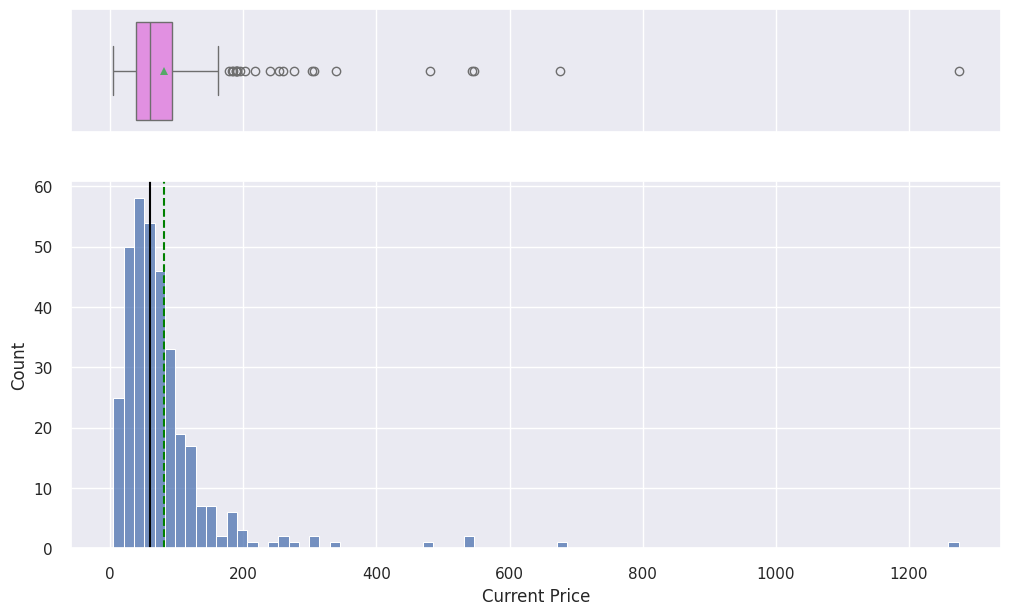

In [ ]:
histogram_boxplot(df,'Current Price')

* 50% of the Current stocks price is between 60 dollars and 180 dollars, with very high ouliers to the right.
* The graph is heavily right skewed with a mean of 80$.

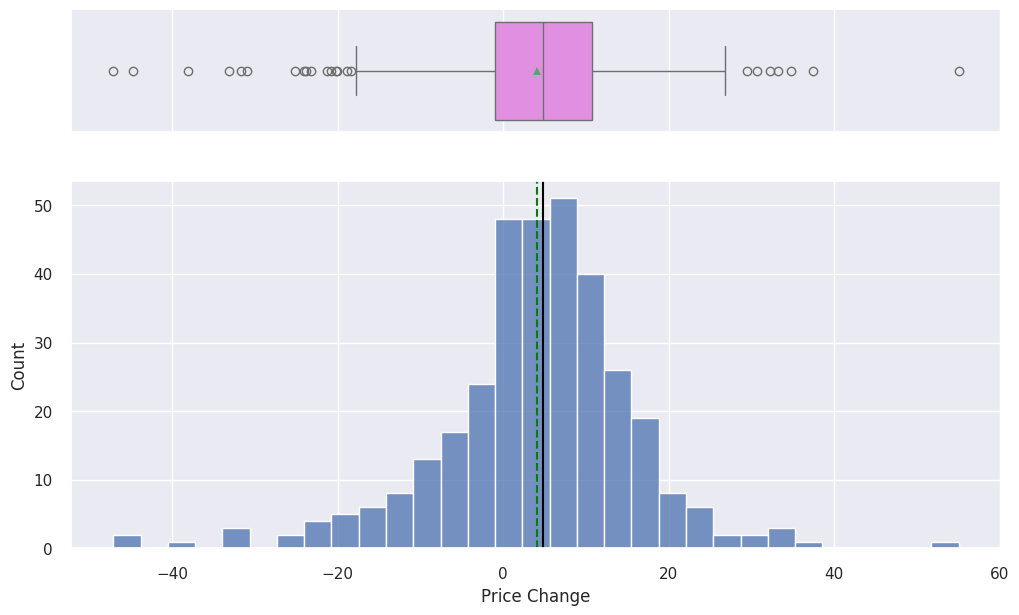

In [ ]:
histogram_boxplot(df, 'Price Change')

*  Percentage change in the stock price in 13 weeks graph is very close to normally distributed with outliers on both sides.

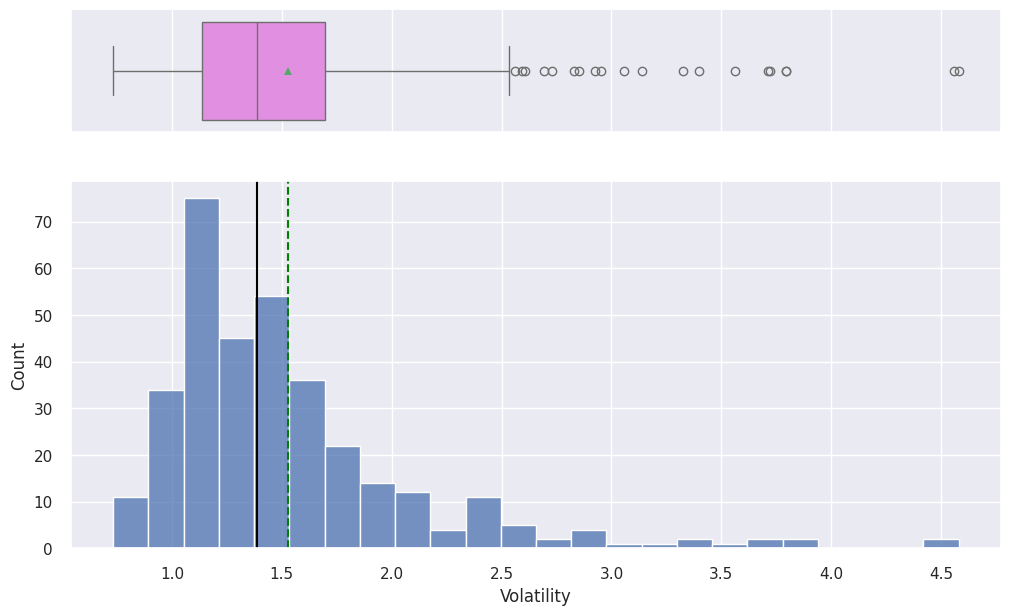

In [ ]:
histogram_boxplot(df,'Volatility')

* The graph for Standard deviation of the stock price over the past 13 weeks is right skewed with a mean of 1.5.

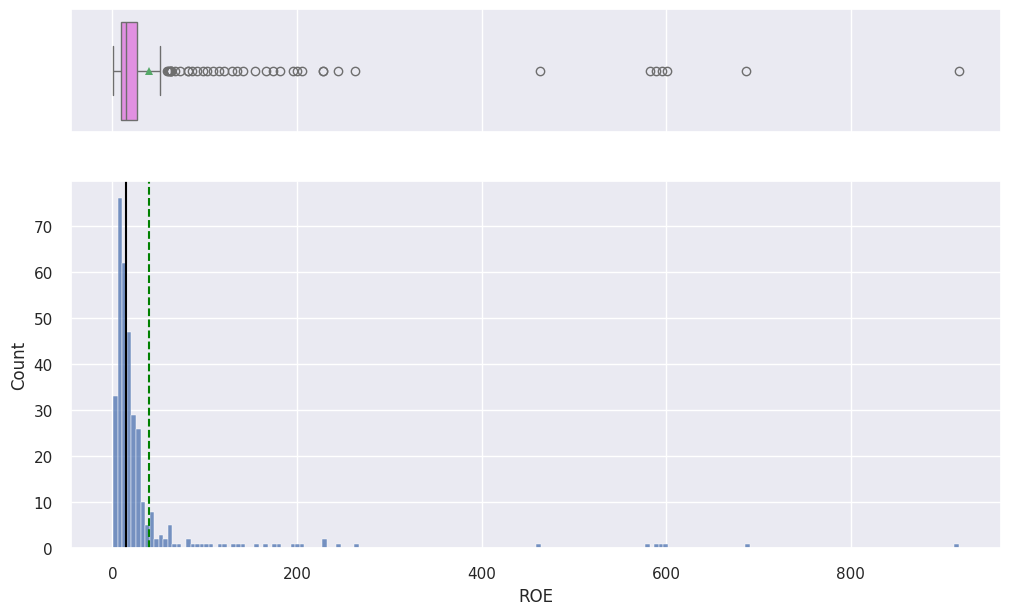

In [ ]:
histogram_boxplot(df,'ROE')

* The graph for the measure of financial performance is heavily right skewed with many extreme ouliers.

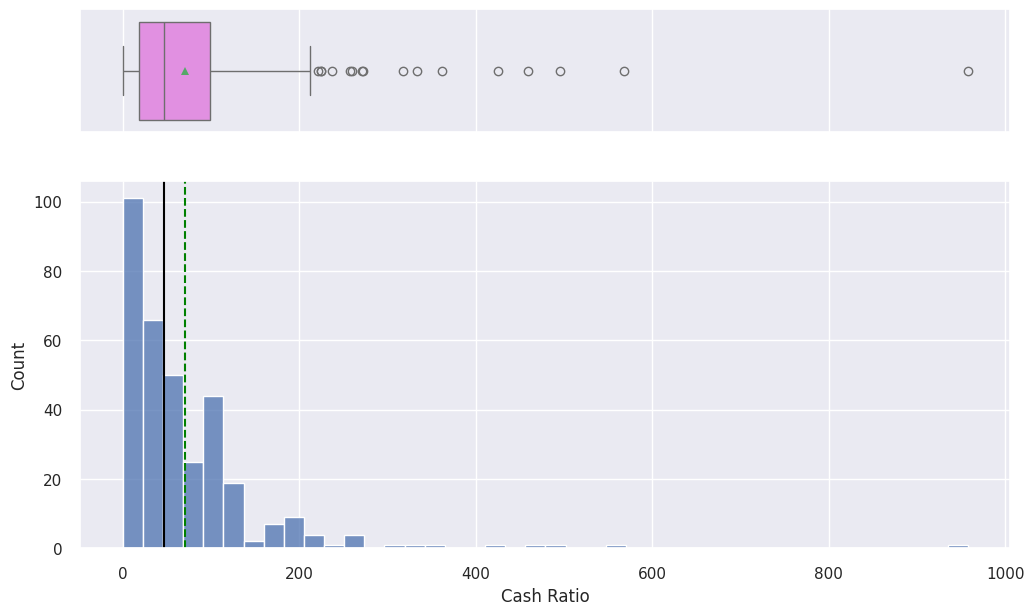

In [ ]:
histogram_boxplot(df,'Cash Ratio')

 * The graph is right skewed with a mean of 70 and very few cash ratio more than 200.

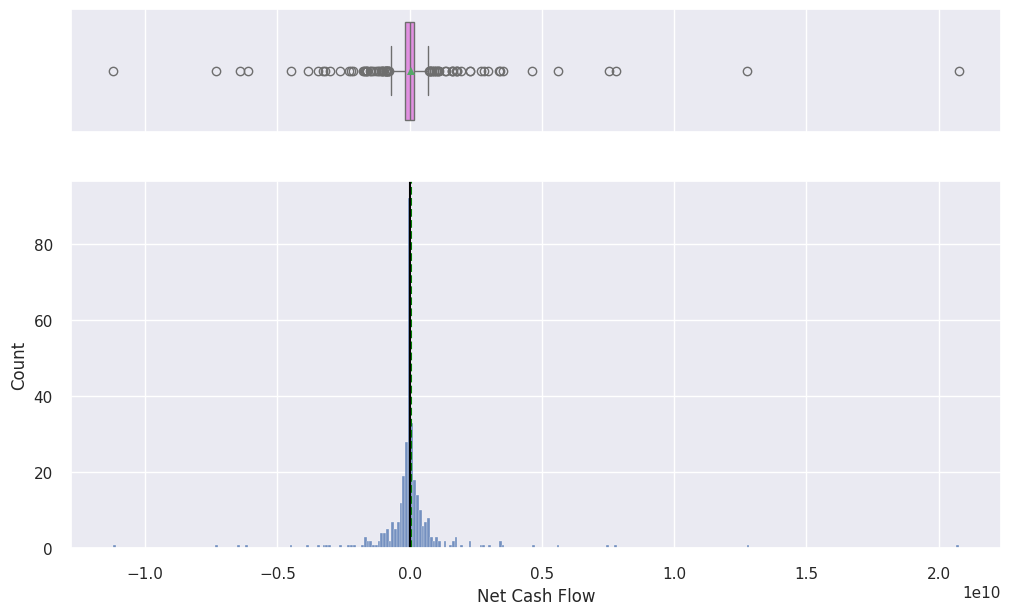

In [ ]:
histogram_boxplot(df,'Net Cash Flow')

* The Net cash flows distribution is close to normal with a lot of outliers on both sides.

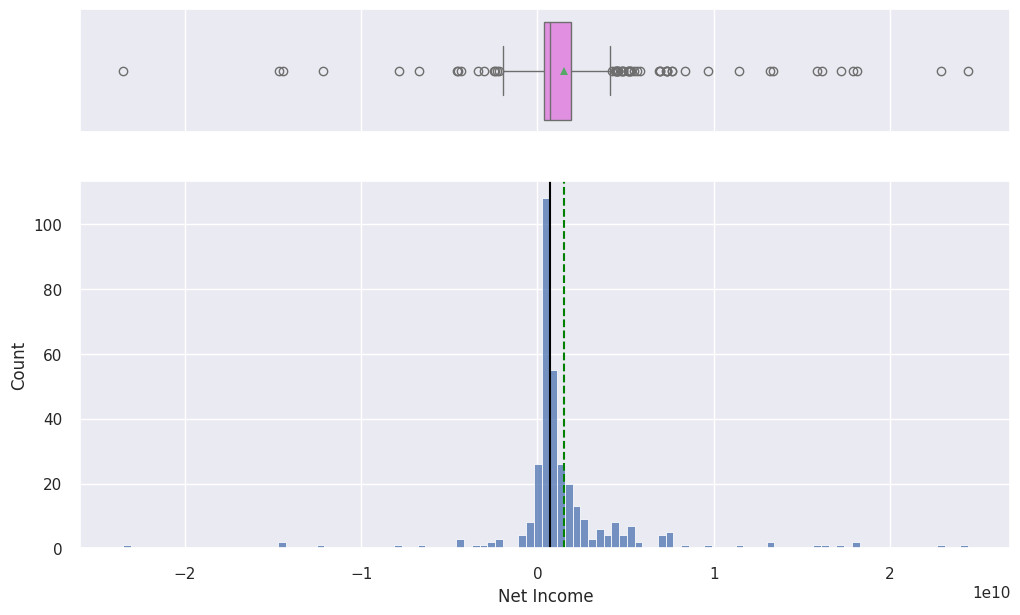

In [ ]:
histogram_boxplot(df,'Net Income')

* Also Net income is close to normal with a lot of outliers.

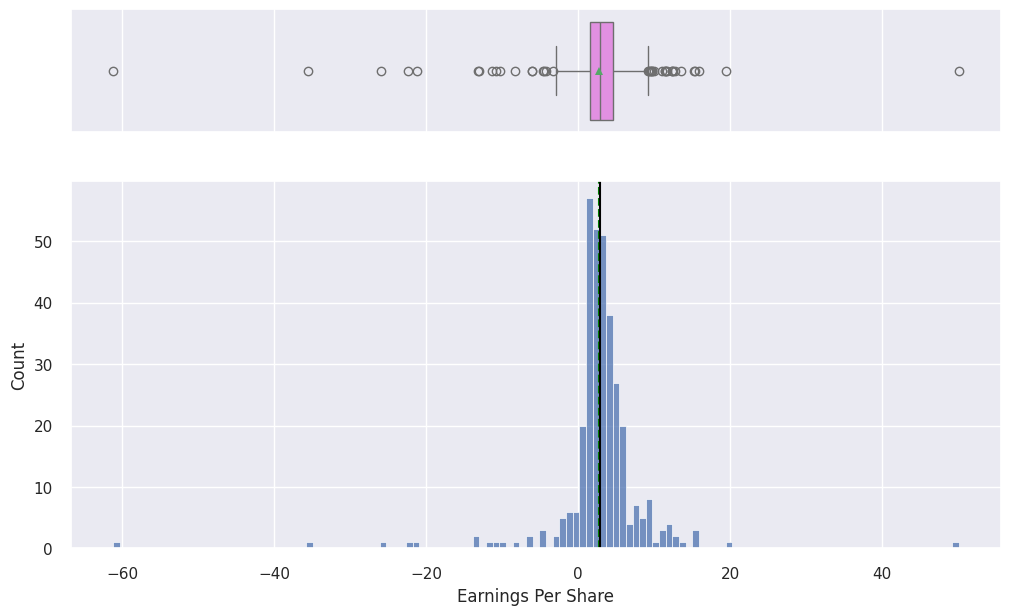

In [ ]:
histogram_boxplot(df,'Earnings Per Share')

* Earnings per share is close to normal with a lot of outliers.

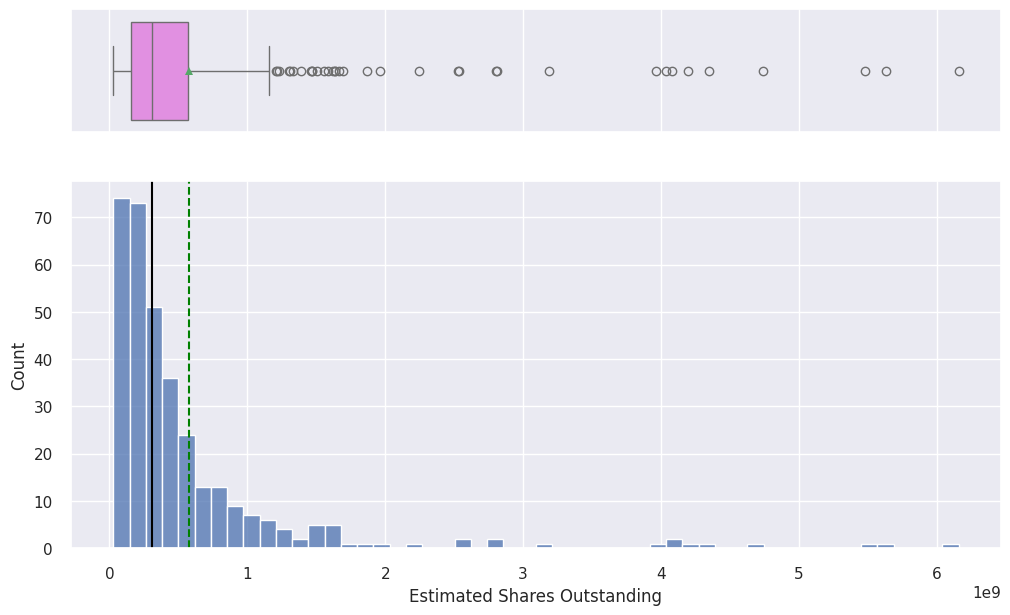

In [ ]:
histogram_boxplot(df,'Estimated Shares Outstanding')

* The disruption is fight-skewed ad few companies have more than a billion outstanding shares.

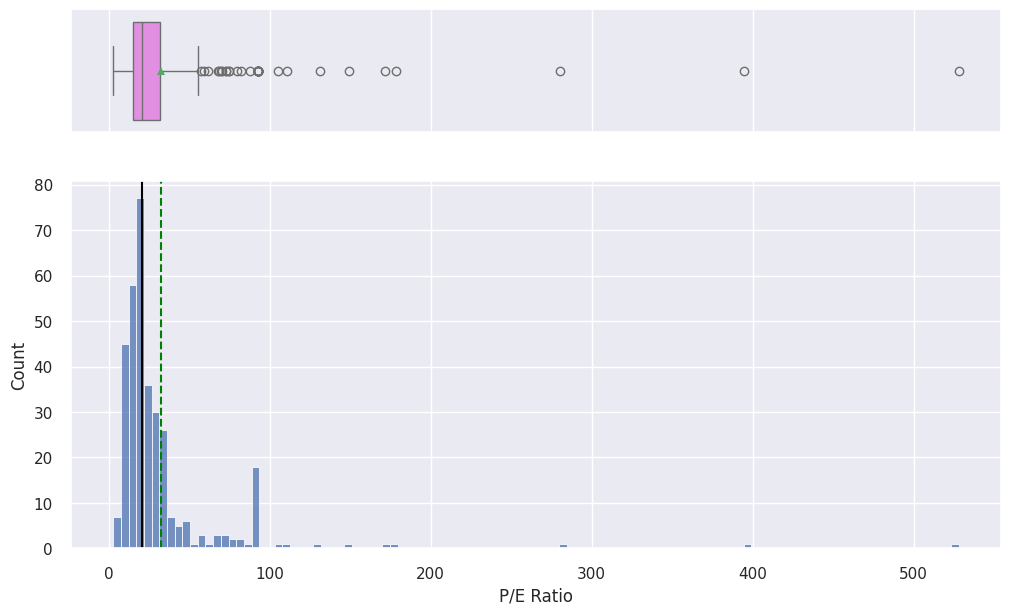

In [ ]:
histogram_boxplot(df,'P/E Ratio')

* The distribution is a right-skewed and very few companies have a P/E ratio greater than 100.  

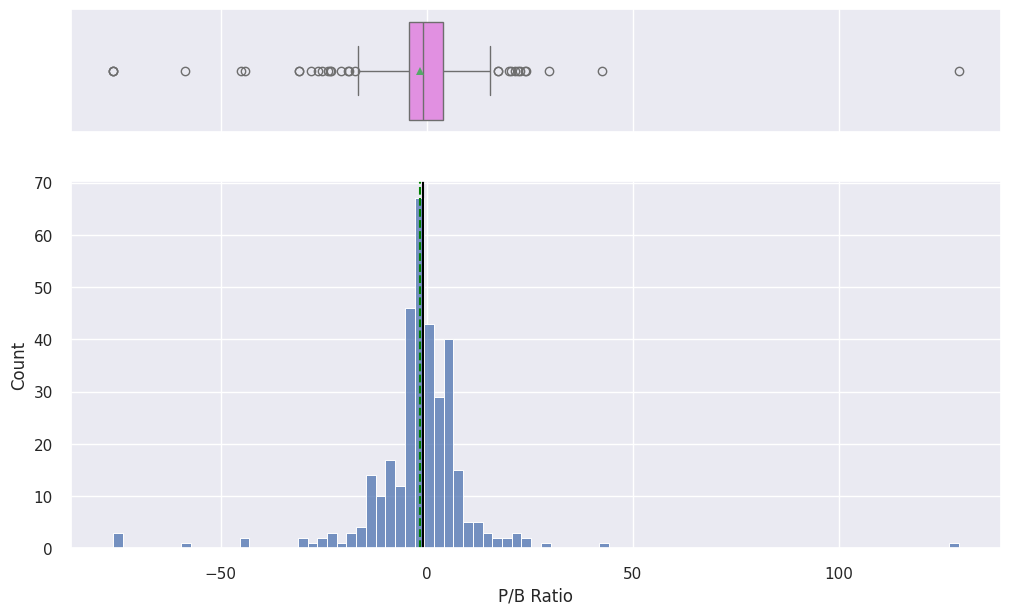

In [ ]:
histogram_boxplot(df,'P/B Ratio')

* The distribution is close to normal with few outliers.

# Exploring the categorical data:

In [ ]:
def labeled_barplot(df, feature, perc=False, n=None):
    total = len(df[feature])
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )
    plt.show()

GICS Sector:

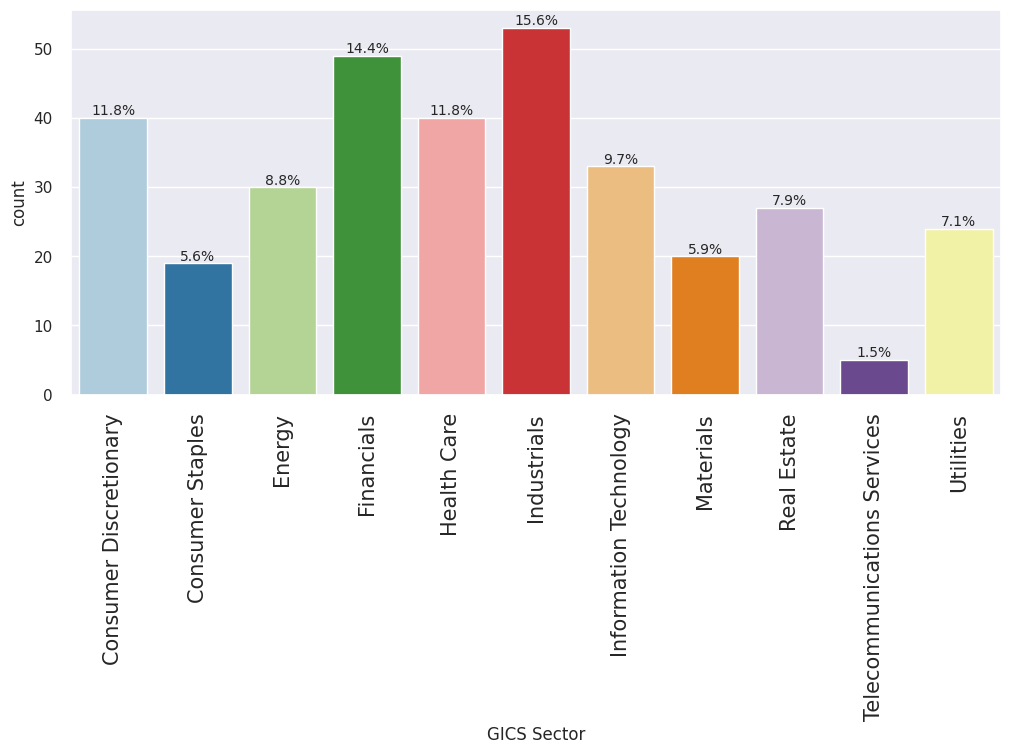

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)

* 30% of the companies are from industrial and financial sectors.
* Telecommuication Services has the least weightage of companies in the data.

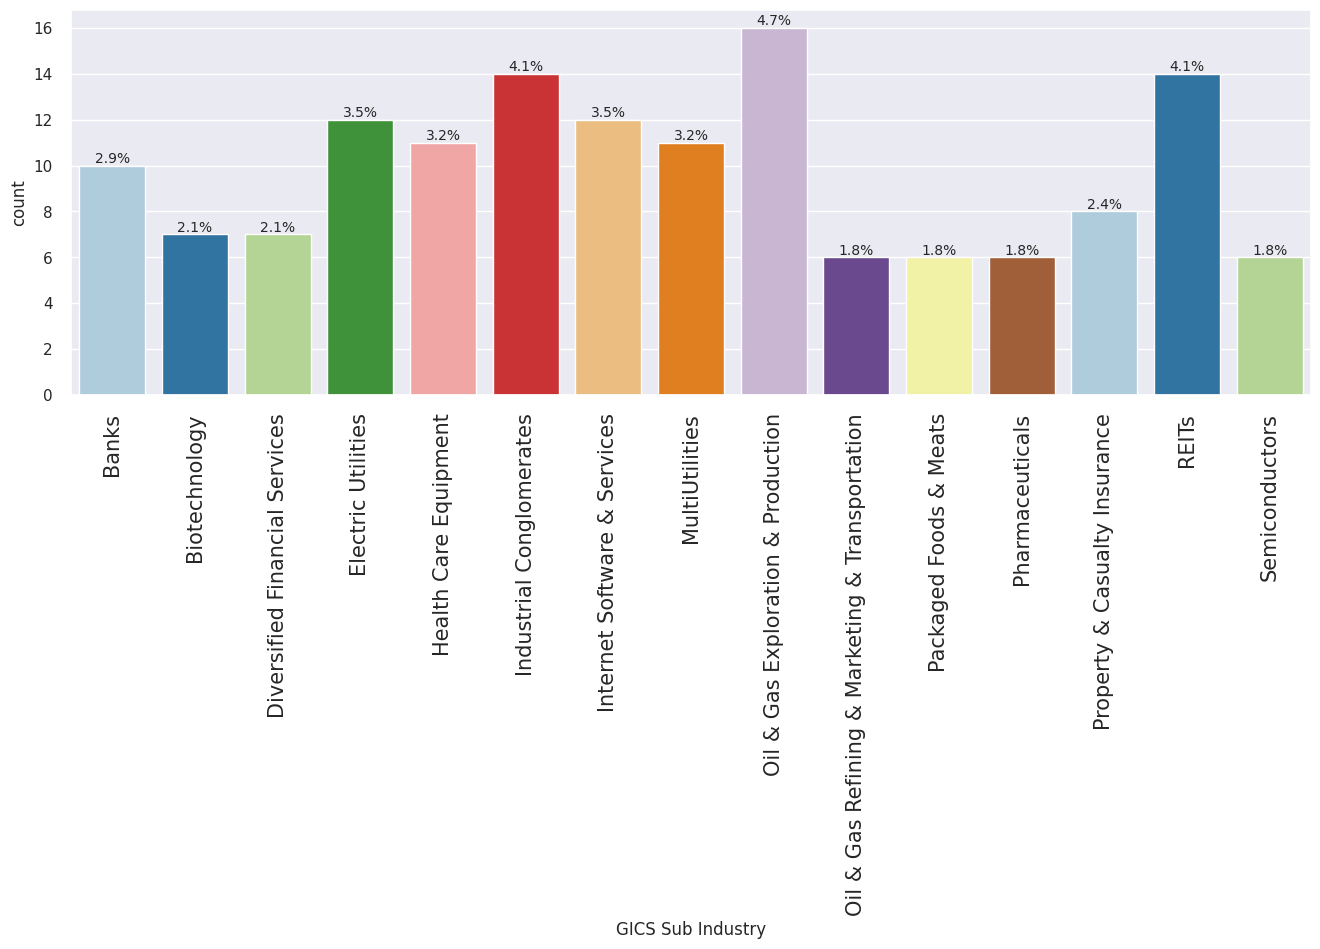

In [ ]:
labeled_barplot(df, 'GICS Sub Industry', perc=True, n = 15)

* Most of the companies in the data belong to the Oil and Gas Exploration and production sub-industry.

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

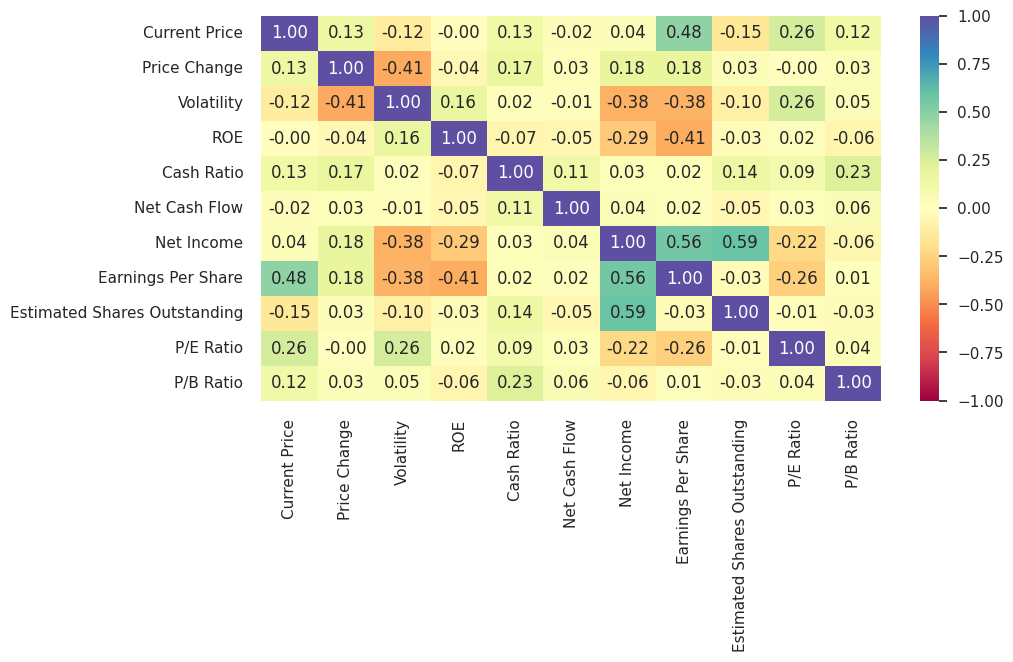

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Non of the variables show a very high correlation with each other.
* There is a a postive relation between net income and both estimated shares outstanding ad earnings per share.
   * which make sense as the more a company makes, the more each share holder will earn and more people will be willing to invest in the company.

* There is a negative relation between volatility and price change.

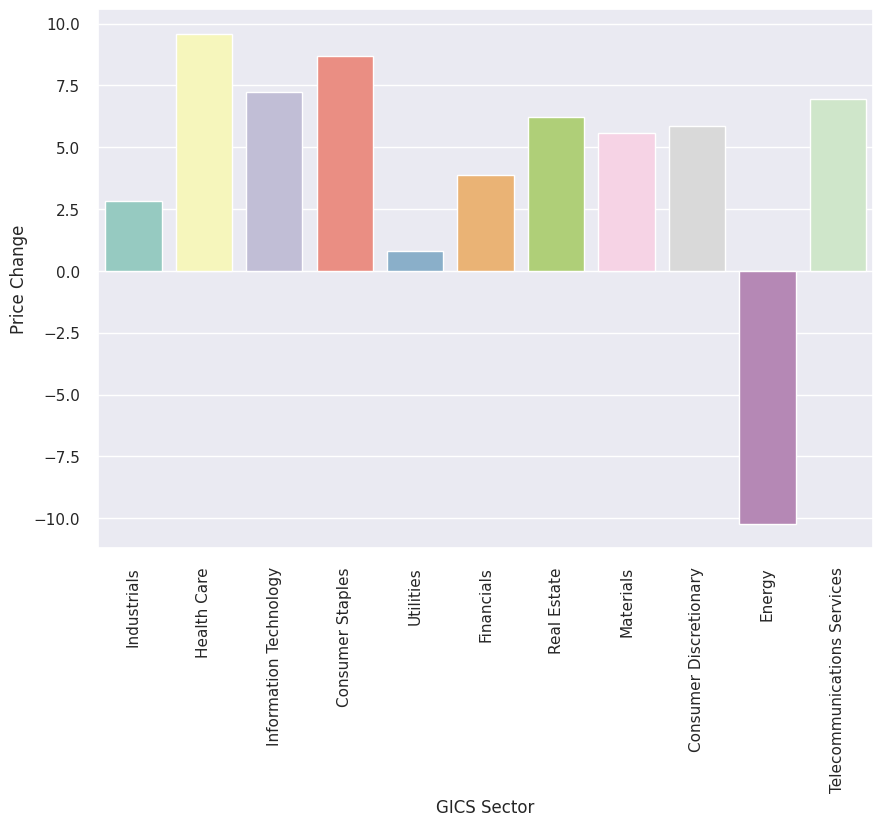

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False, palette='Set3')
plt.xticks(rotation=90)
plt.show()

* Percentage change in the stock Prices for over a year for all sectors is in the positive except for the energy sector.
* Healthcare sector has the highest percent change of around 9% followed by consumer staples with 8%.
* Utilities sector had the lowest increase precent in the stocks price with an increase of 1% only.


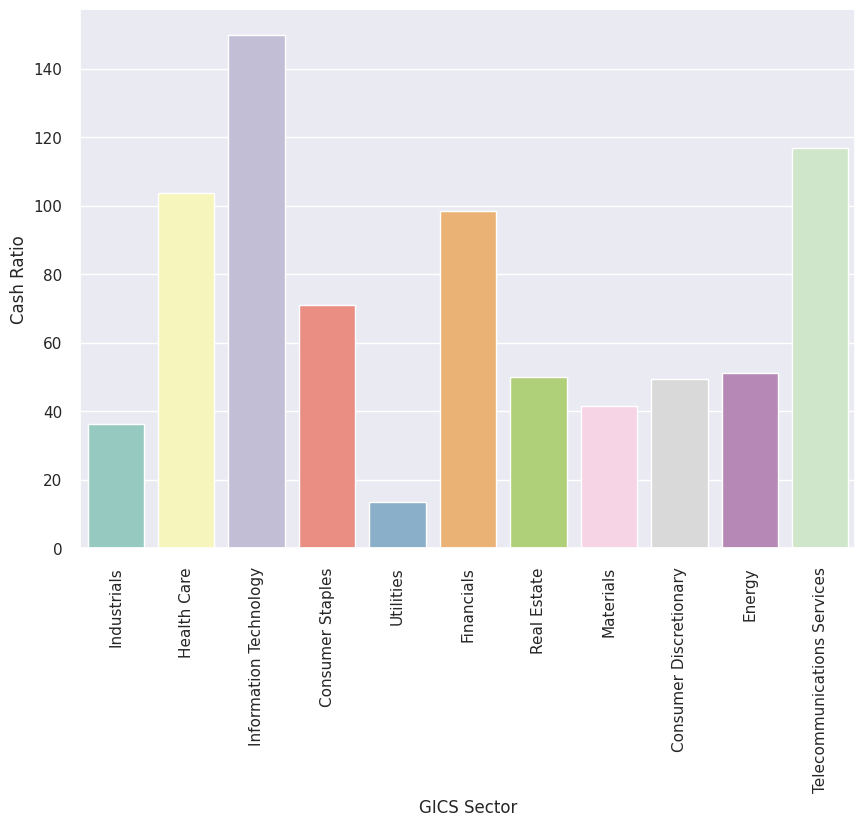

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False, palette='Set3')
plt.xticks(rotation=90)
plt.show()

* Information technology has the highest cash ratio compared to the other sectors.
* Health care, Financials, Telecommunication services sectors have good cash ratio.
* Other sectors have a lower cash ratio, with Utilities sector has the lowest cash ratio.

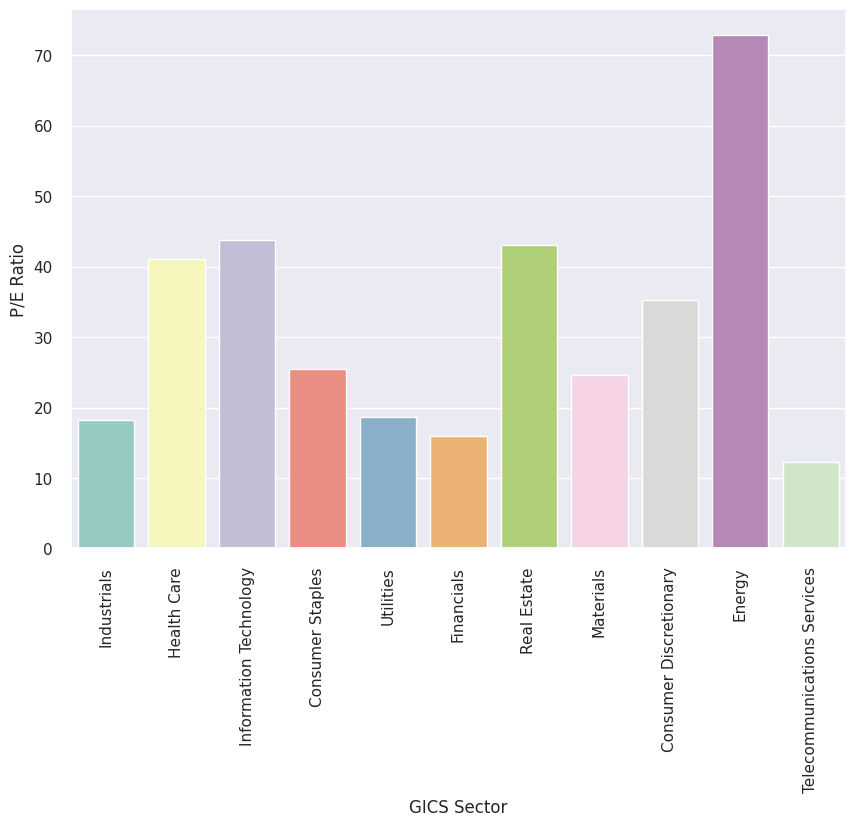

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False, palette='Set3')
plt.xticks(rotation=90)
plt.show()

* The P/E ratio is highest for the Energy sector companies but the witness an average decrease over the past quarter. This might indicate that the stocks of this sector are overvalued.

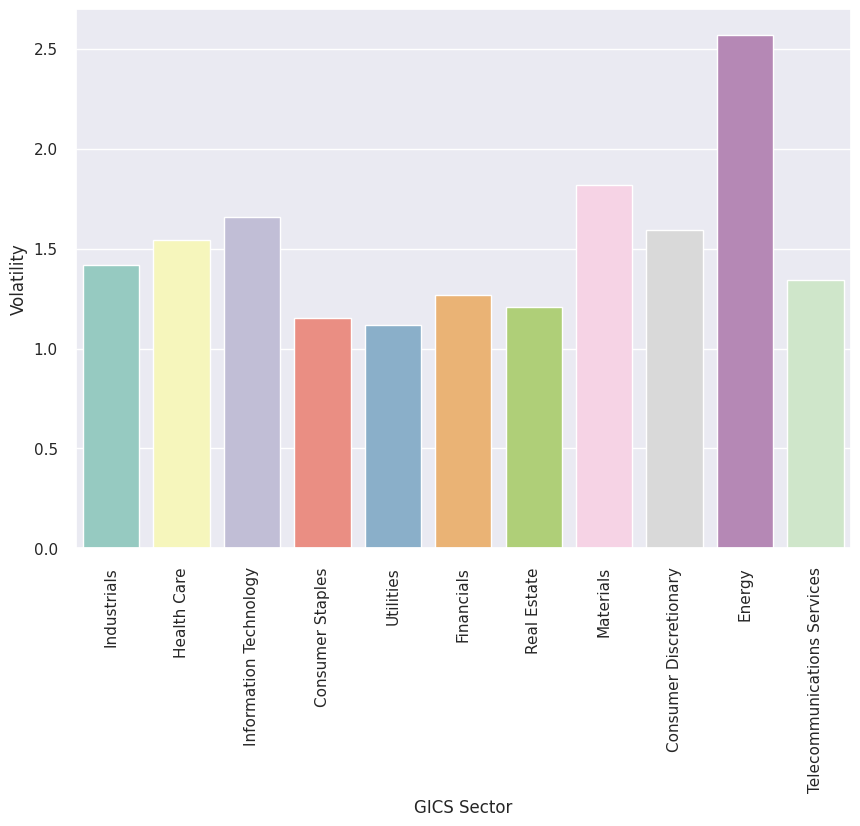

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False, palette='Set3')
plt.xticks(rotation=90)
plt.show()

* Energy sector have the highest volatility compared to other sectors which may imply higher risk.
* All other sectors have medium volatility.

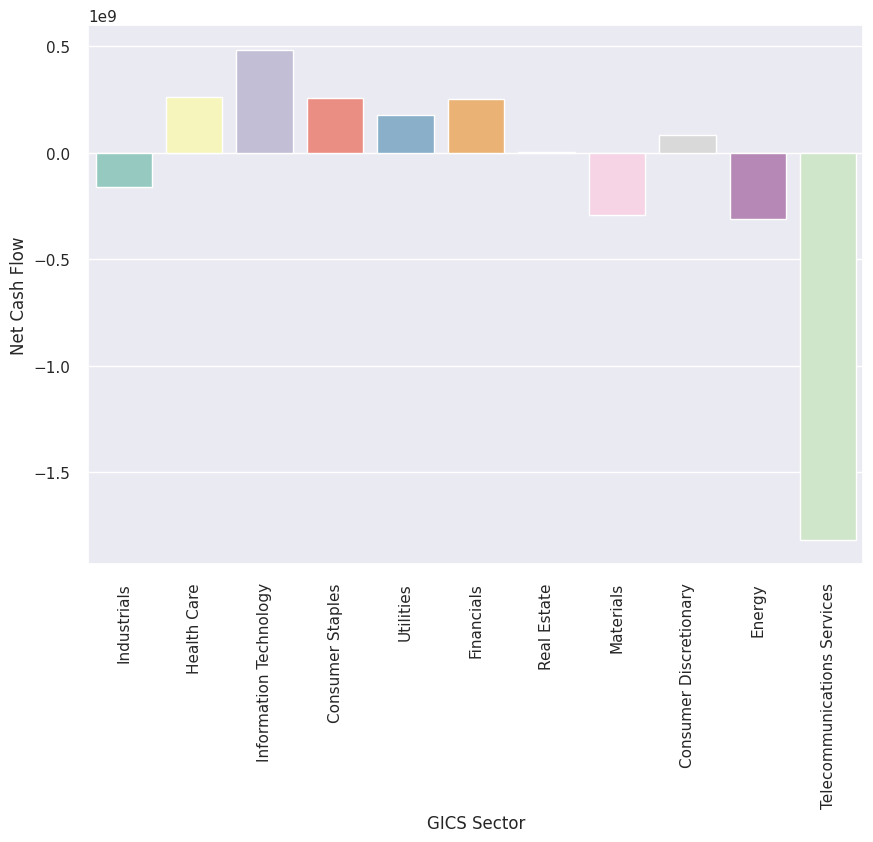

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='GICS Sector', y='Net Cash Flow', ci=False,palette='Set3')
plt.xticks(rotation=90)
plt.show()

* Telecommunication services sector have a high negative net cash flow.
* Moreover, Industrials, Materials and energy sectors have a negtaive nat cash flow.
* All others sectors have a positive nest cash flow, where information technology has the highest net cash flow.

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

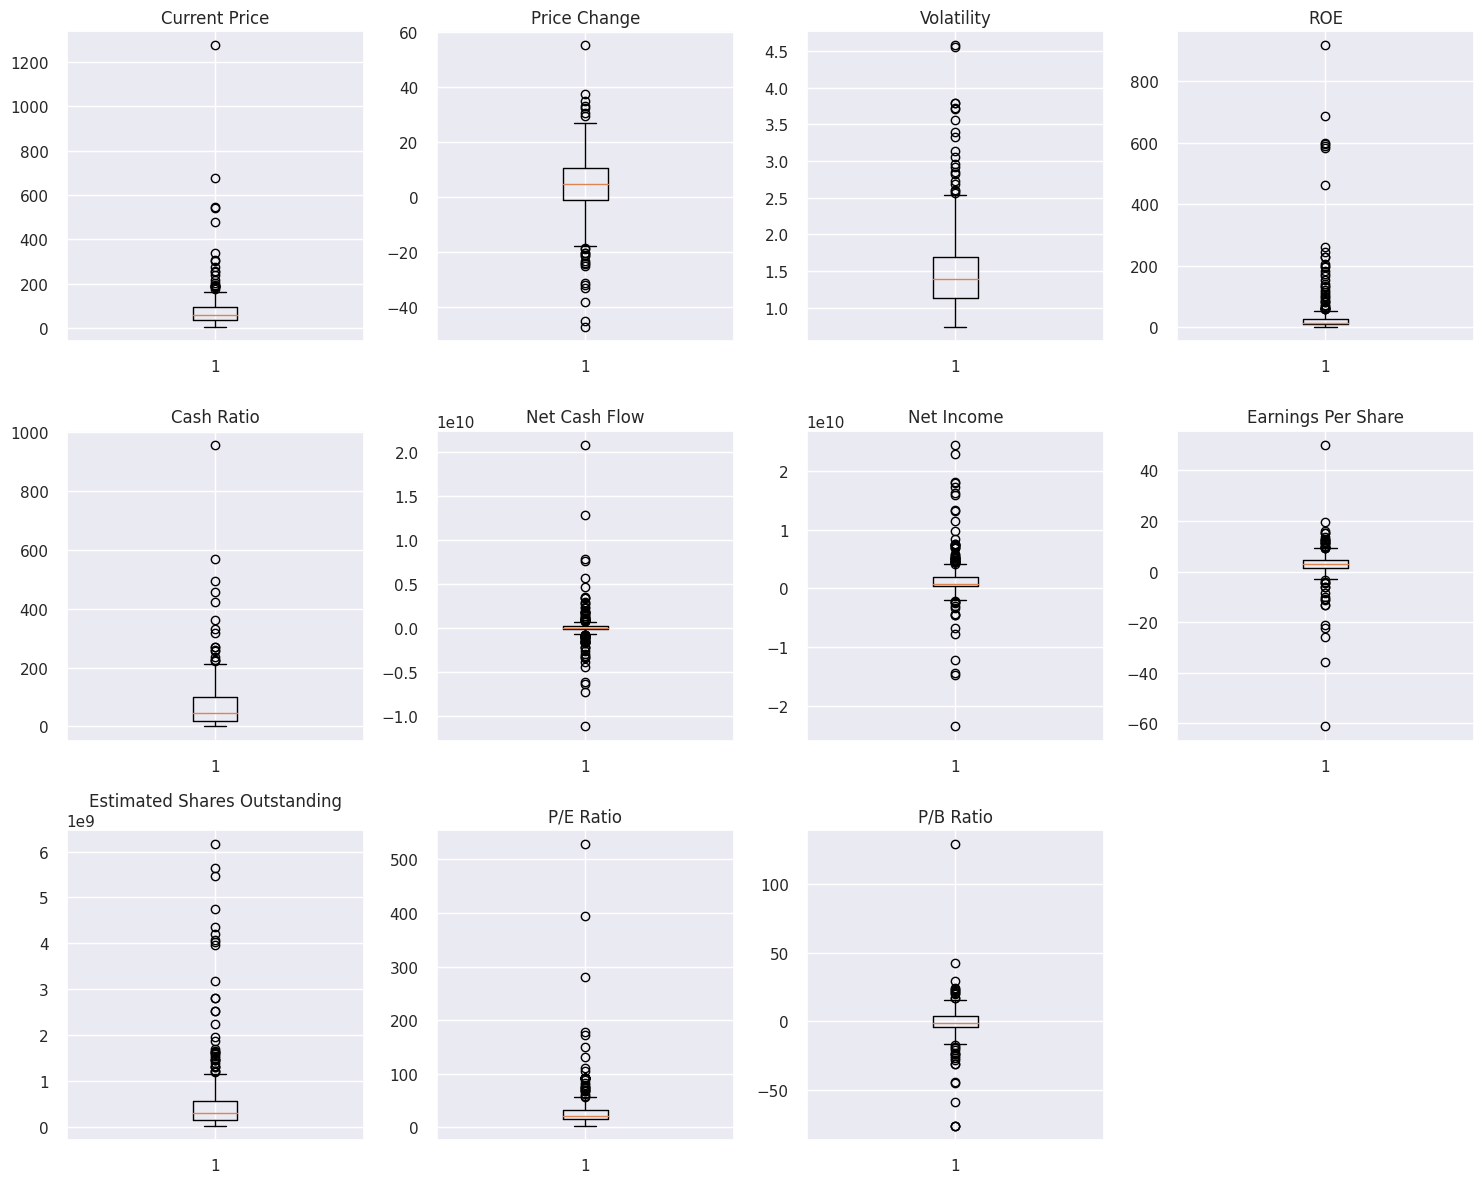

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Outliers will not be treated as they are real data, as these differences happen in the markets.

## K-means Clustering

In [ ]:
scaler = StandardScaler()
subset = numeric_df
subset_scaled = scaler.fit_transform(subset)

In [ ]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


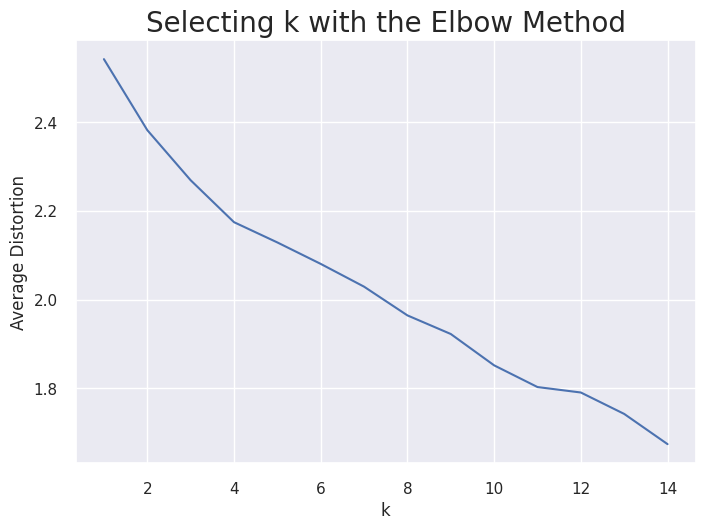

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

* The Elbow Method highlights that increasing clusters beyond k=5 offers little benefit.
* The differences in average distortion at k=3, k=4, and k=5 signify the effectiveness of these cluster, so they will be further explored.

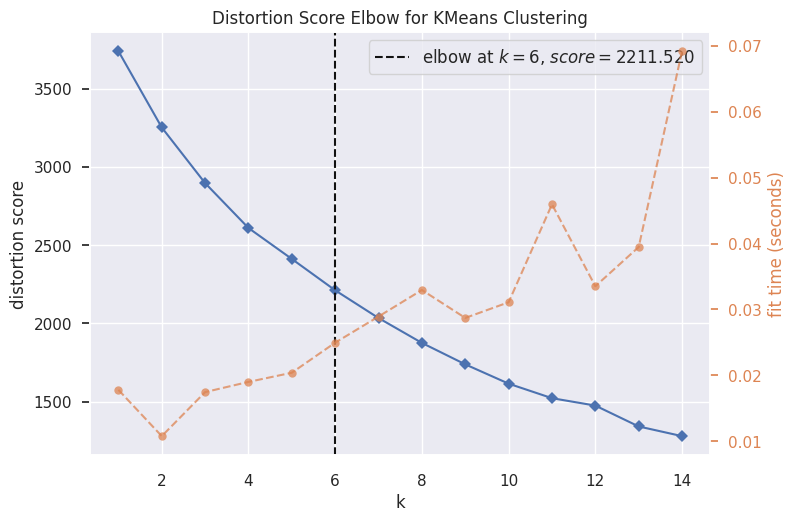

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)
visualizer.show()

* The appropriate value of k from the elbow curve seems to be 6.

For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)


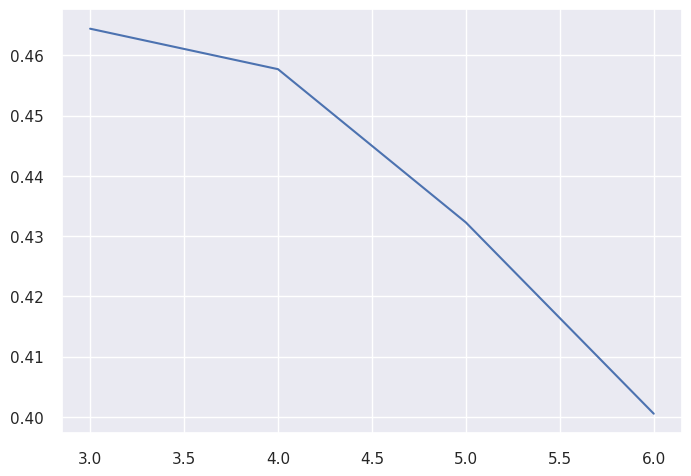

In [ ]:
sil_score = []
cluster_list = range(3, 7)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

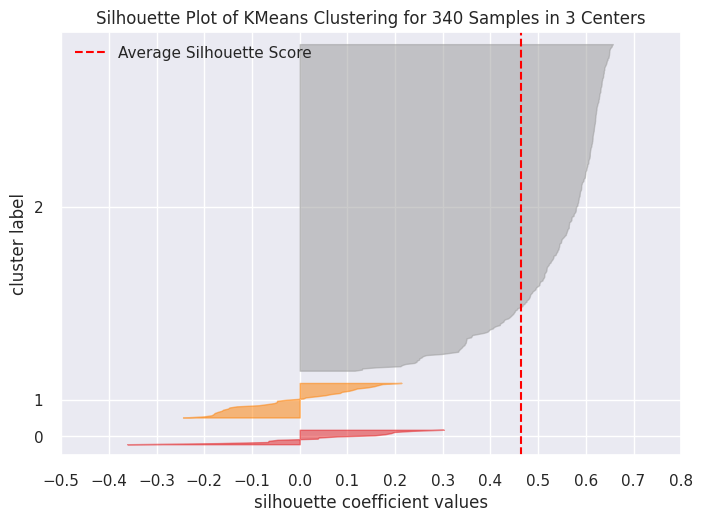

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

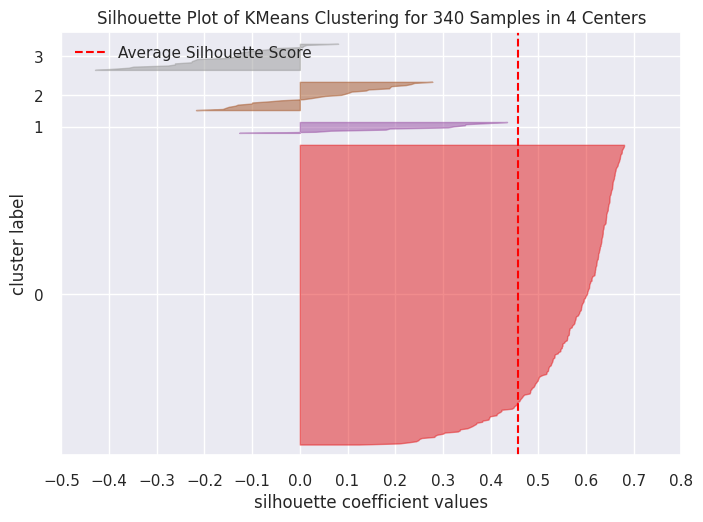

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

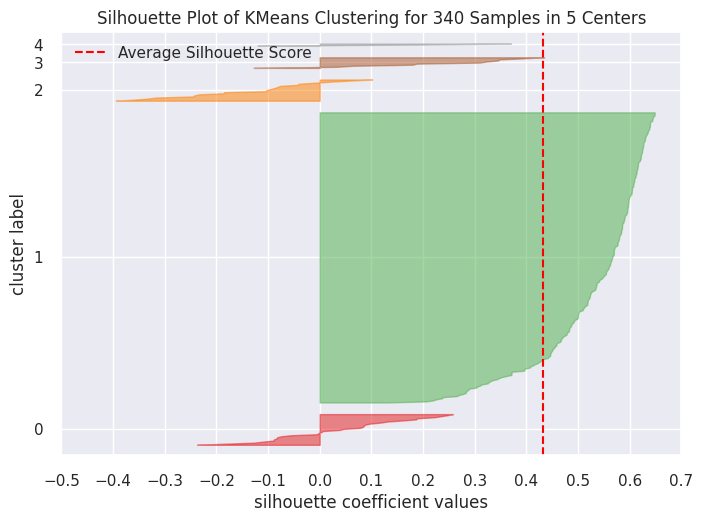

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

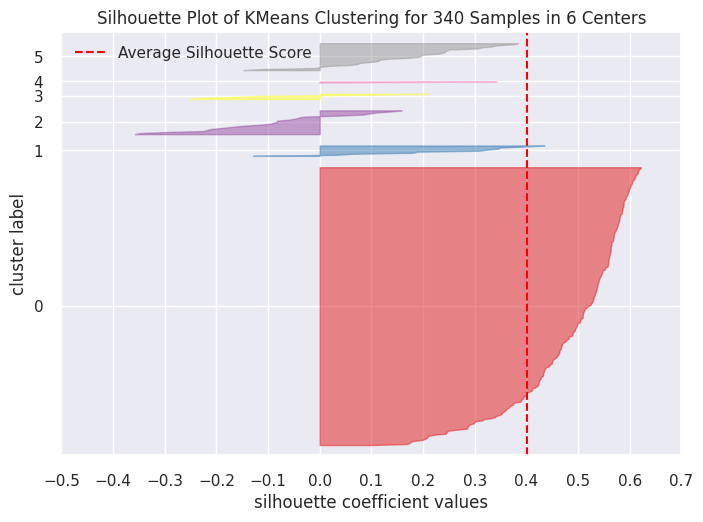

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

* The best value for K is 4, it gives better clasification than 3 and there is no much differet compared to 5 and 6.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [ ]:
df2 = df.copy()

In [ ]:
k_means_df["K_mean_segments"] = kmeans.labels_
df2["K_mean_segments"] = kmeans.labels_

In [ ]:
df2.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_mean_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,3
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831,0
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585,3
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497,0
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649,0
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912,0


In [ ]:
numeric_cols = df2.select_dtypes(include=np.number)
km_cluster_profile = numeric_cols.groupby("K_mean_segments").mean()


In [ ]:
km_cluster_profile["count_in_each_segment"] = (
   df2.groupby("K_mean_segments")["Security"].count().values
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_mean_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [ ]:
for cl in df2["K_mean_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["K_mean_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [ ]:
df2.groupby(["K_mean_segments", "GICS Sector"])['Security'].count()

K_mean_segments  GICS Sector                
0                Consumer Discretionary         33
                 Consumer Staples               17
                 Energy                          6
                 Financials                     45
                 Health Care                    29
                 Industrials                    52
                 Information Technology         24
                 Materials                      19
                 Real Estate                    26
                 Telecommunications Services     2
                 Utilities                      24
1                Consumer Discretionary          1
                 Consumer Staples                1
                 Energy                          1
                 Financials                      3
                 Health Care                     2
                 Information Technology          1
                 Telecommunications Services     2
2                Energy              

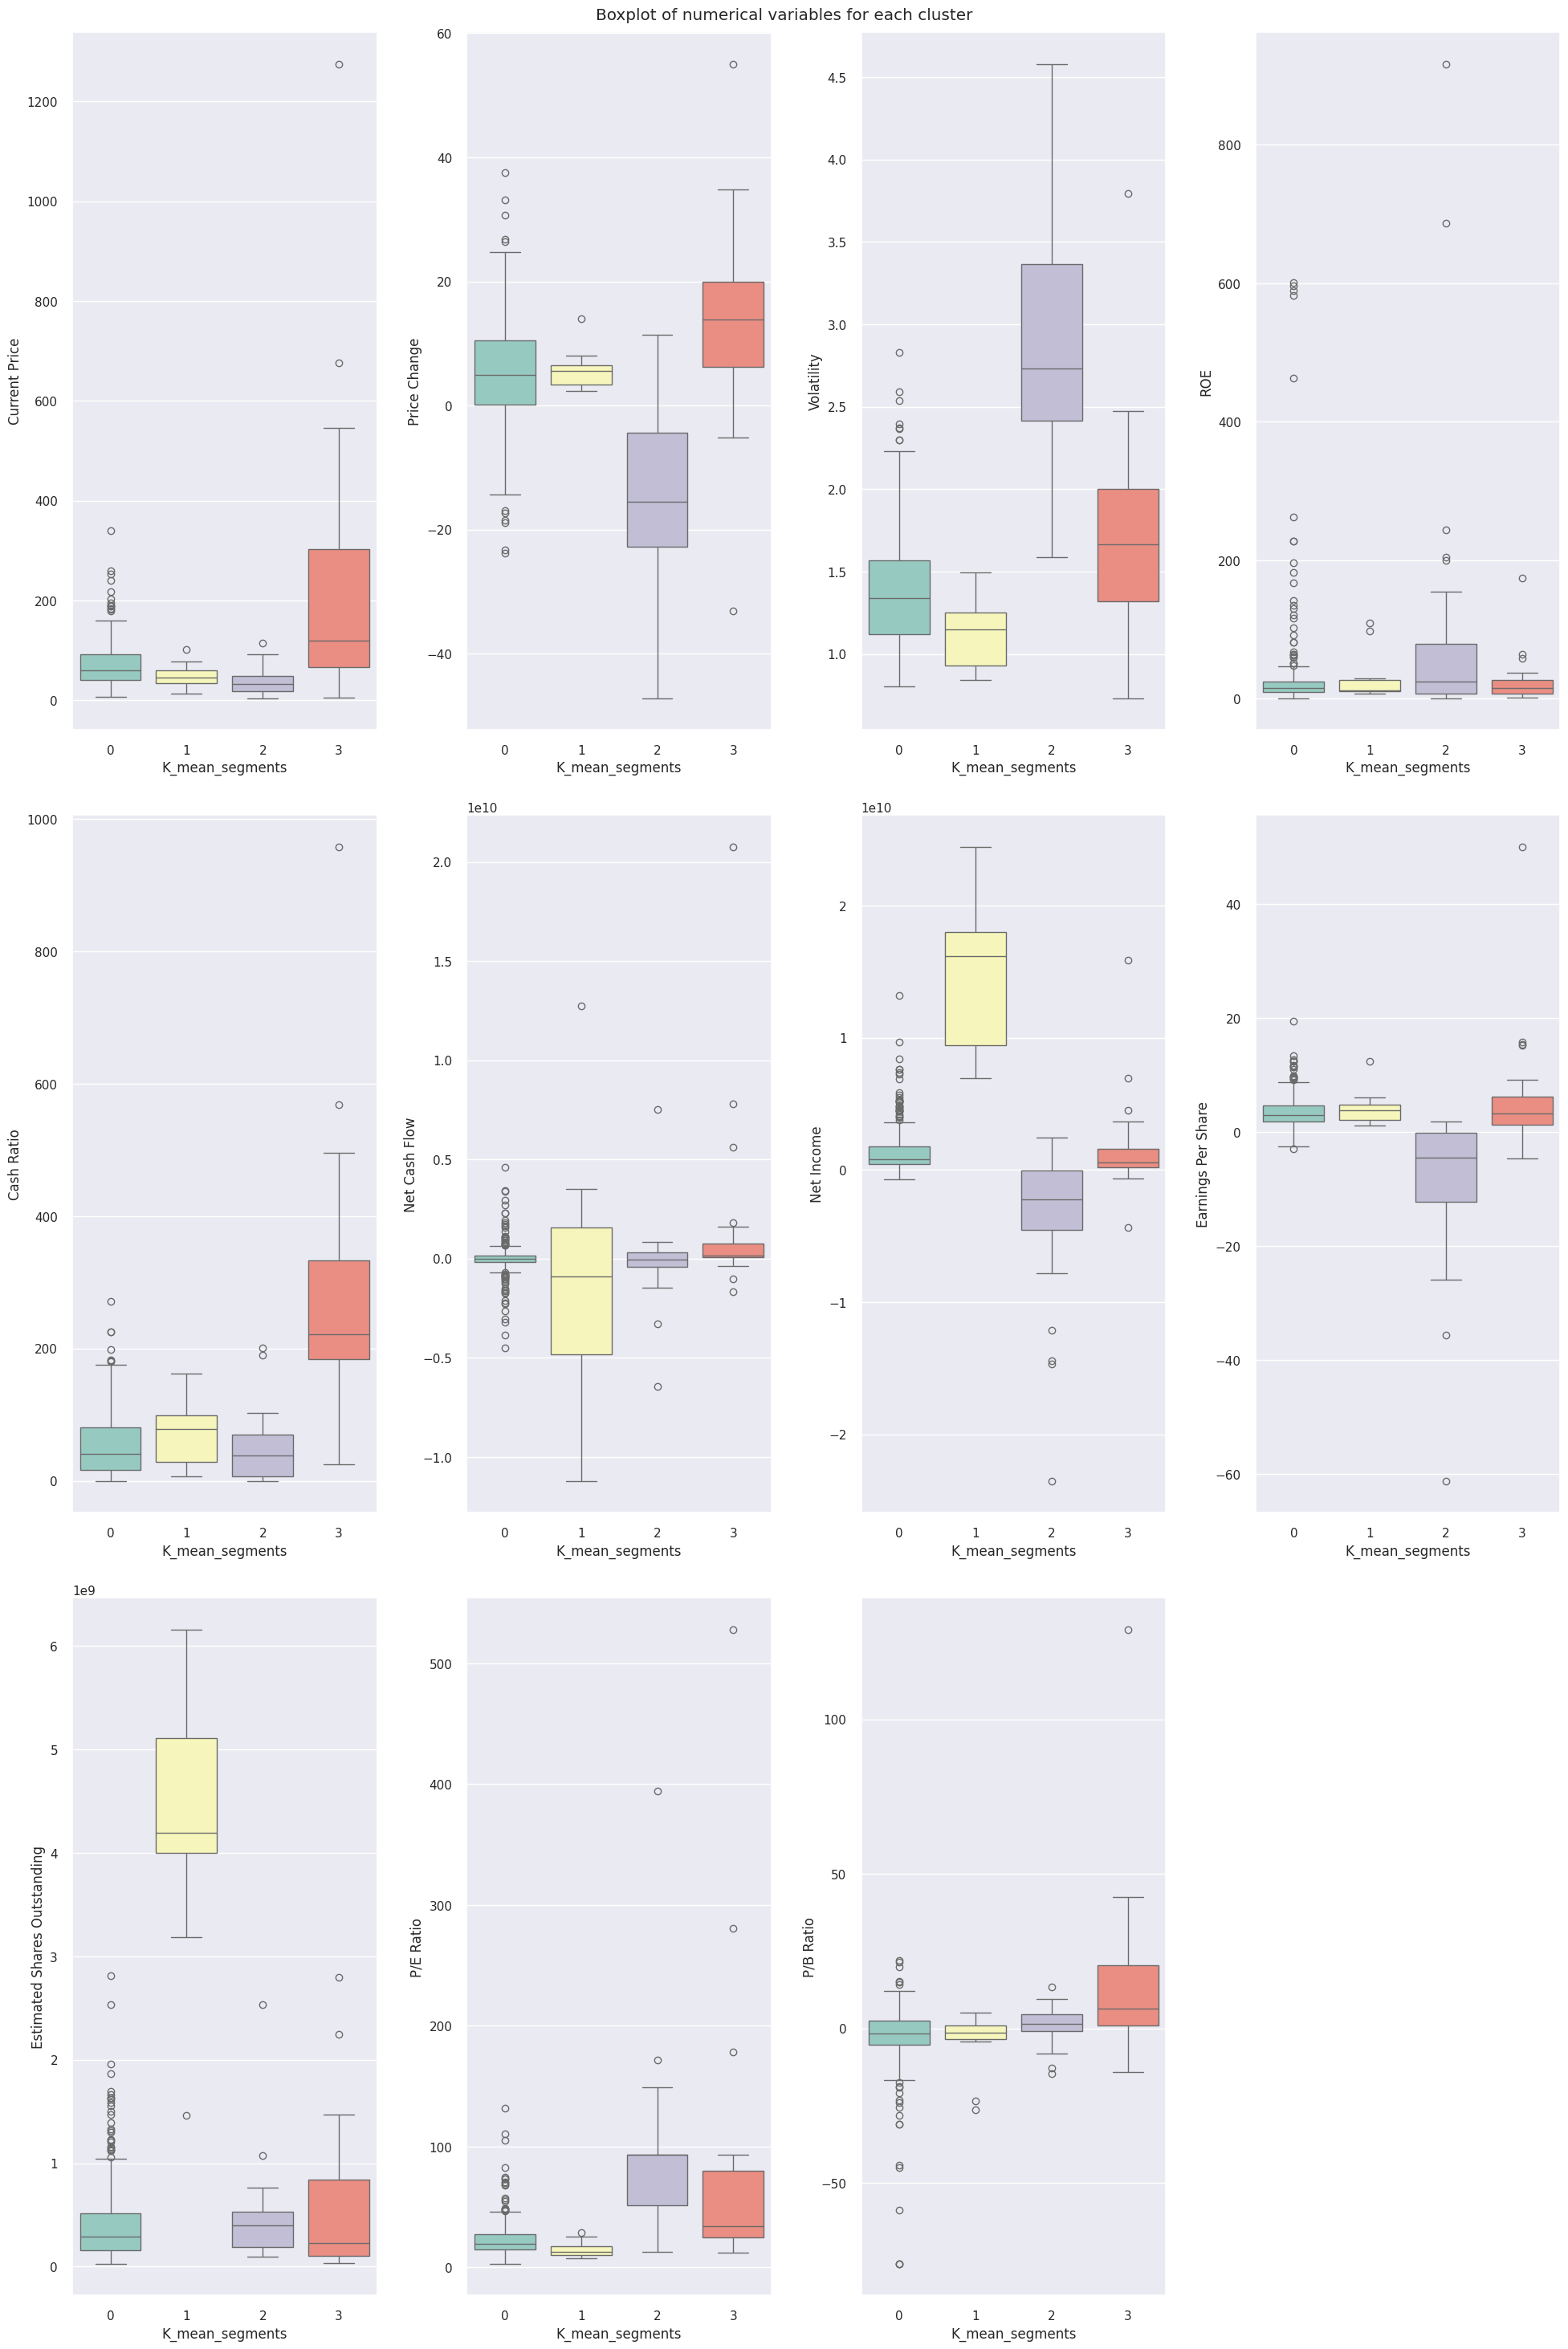

In [ ]:
plt.figure(figsize=(20, 30))
plt.suptitle("Boxplot of numerical variables for each cluster")

num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="K_mean_segments", y=variable, palette='Set3')

plt.tight_layout(pad=2.0)


* Cluster 0:

   * There are 277 companies in this cluster.
   * The stocks of the companies in this cluster have a moderate price, low volatility, and have witnessed a 5% price rise on average.
   * These companies have a low cash ratio and low positive net income.
   * These companies have a low P/E ratio and a low number of outstanding shares.

* Cluster 1:

   * There are 11 companies in this cluster.
   * The stocks of the companies in this cluster have a low price, low volatility, and have witnessed a 6% price rise on average.
   * These companies have a low cash ratio and high positive net income.
   * These companies have a low P/E ratio and a high number of outstanding shares.

* Cluster 2:

  * There are 27 companies in this cluster.
  * The stocks of the companies in this cluster have a low price, high volatility, and have witnessed an 15% price drop on average.
  * These companies have a low cash ratio and negative net income.
  * These companies have a high P/E ratio and a low number of outstanding shares.
  
* Cluster 3:

  * There are 25 combanies in this cluster.
  * The stocks of the companies in this cluster have a high price, moderate volatility, and have witnessed a 13.5% price rise on average.
  * These companies have a high cash ratio and low positive net income.
  * These companies have a moderate P/E ratio and low to moderate number of outstanding shares.

## Hierarchical Clustering

In [ ]:
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


In [ ]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [ ]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

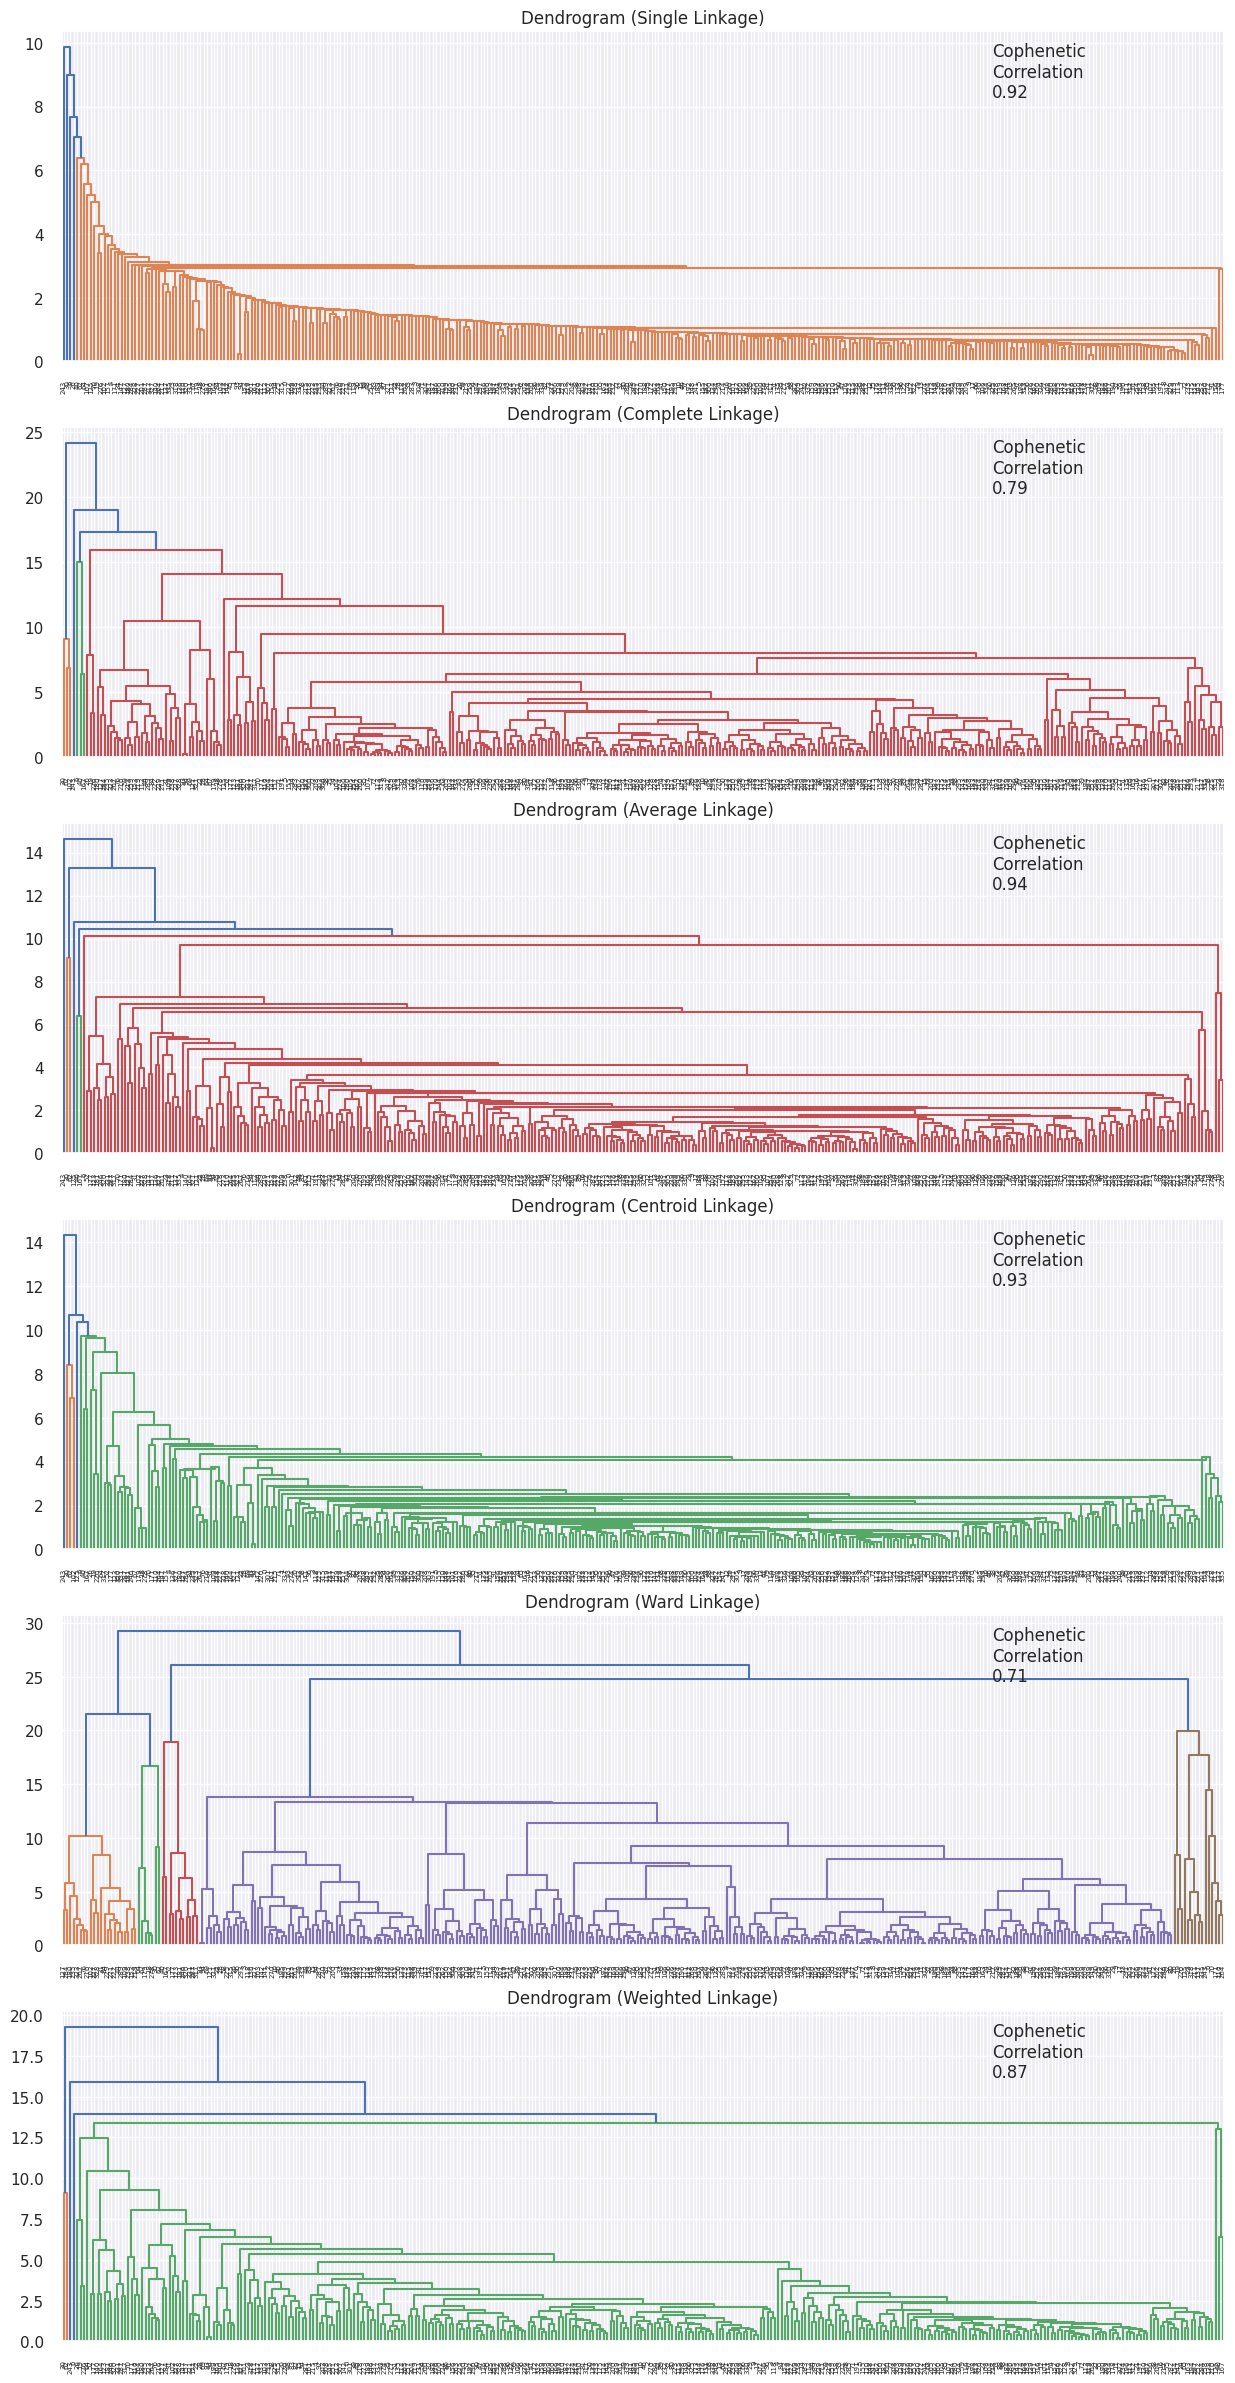

In [ ]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by= "Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


From the dedogram it shows that ward likage i s clustering better using 4 clusters.

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

In [ ]:
cluster_profile = subset_scaled_df.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)

In [ ]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,-0.335572,-1.279650,1.801017,1.628068,-0.329474,-0.283735,-1.294147,-1.743109,-0.107398,0.959689,-0.031863,29
1,2.505708,0.540932,0.197290,-0.261365,2.651985,0.120048,-0.160099,0.761418,-0.038039,1.817445,1.495760,15
2,-0.349197,0.090783,-0.755776,-0.151413,-0.129476,-1.593107,3.394221,0.100165,4.721654,-0.384263,-0.332412,9
3,-0.086102,0.098184,-0.168595,-0.146100,-0.101253,0.072354,0.032696,0.133197,-0.135226,-0.179910,-0.064532,287


In [ ]:
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Cater

In [ ]:
df2.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consum

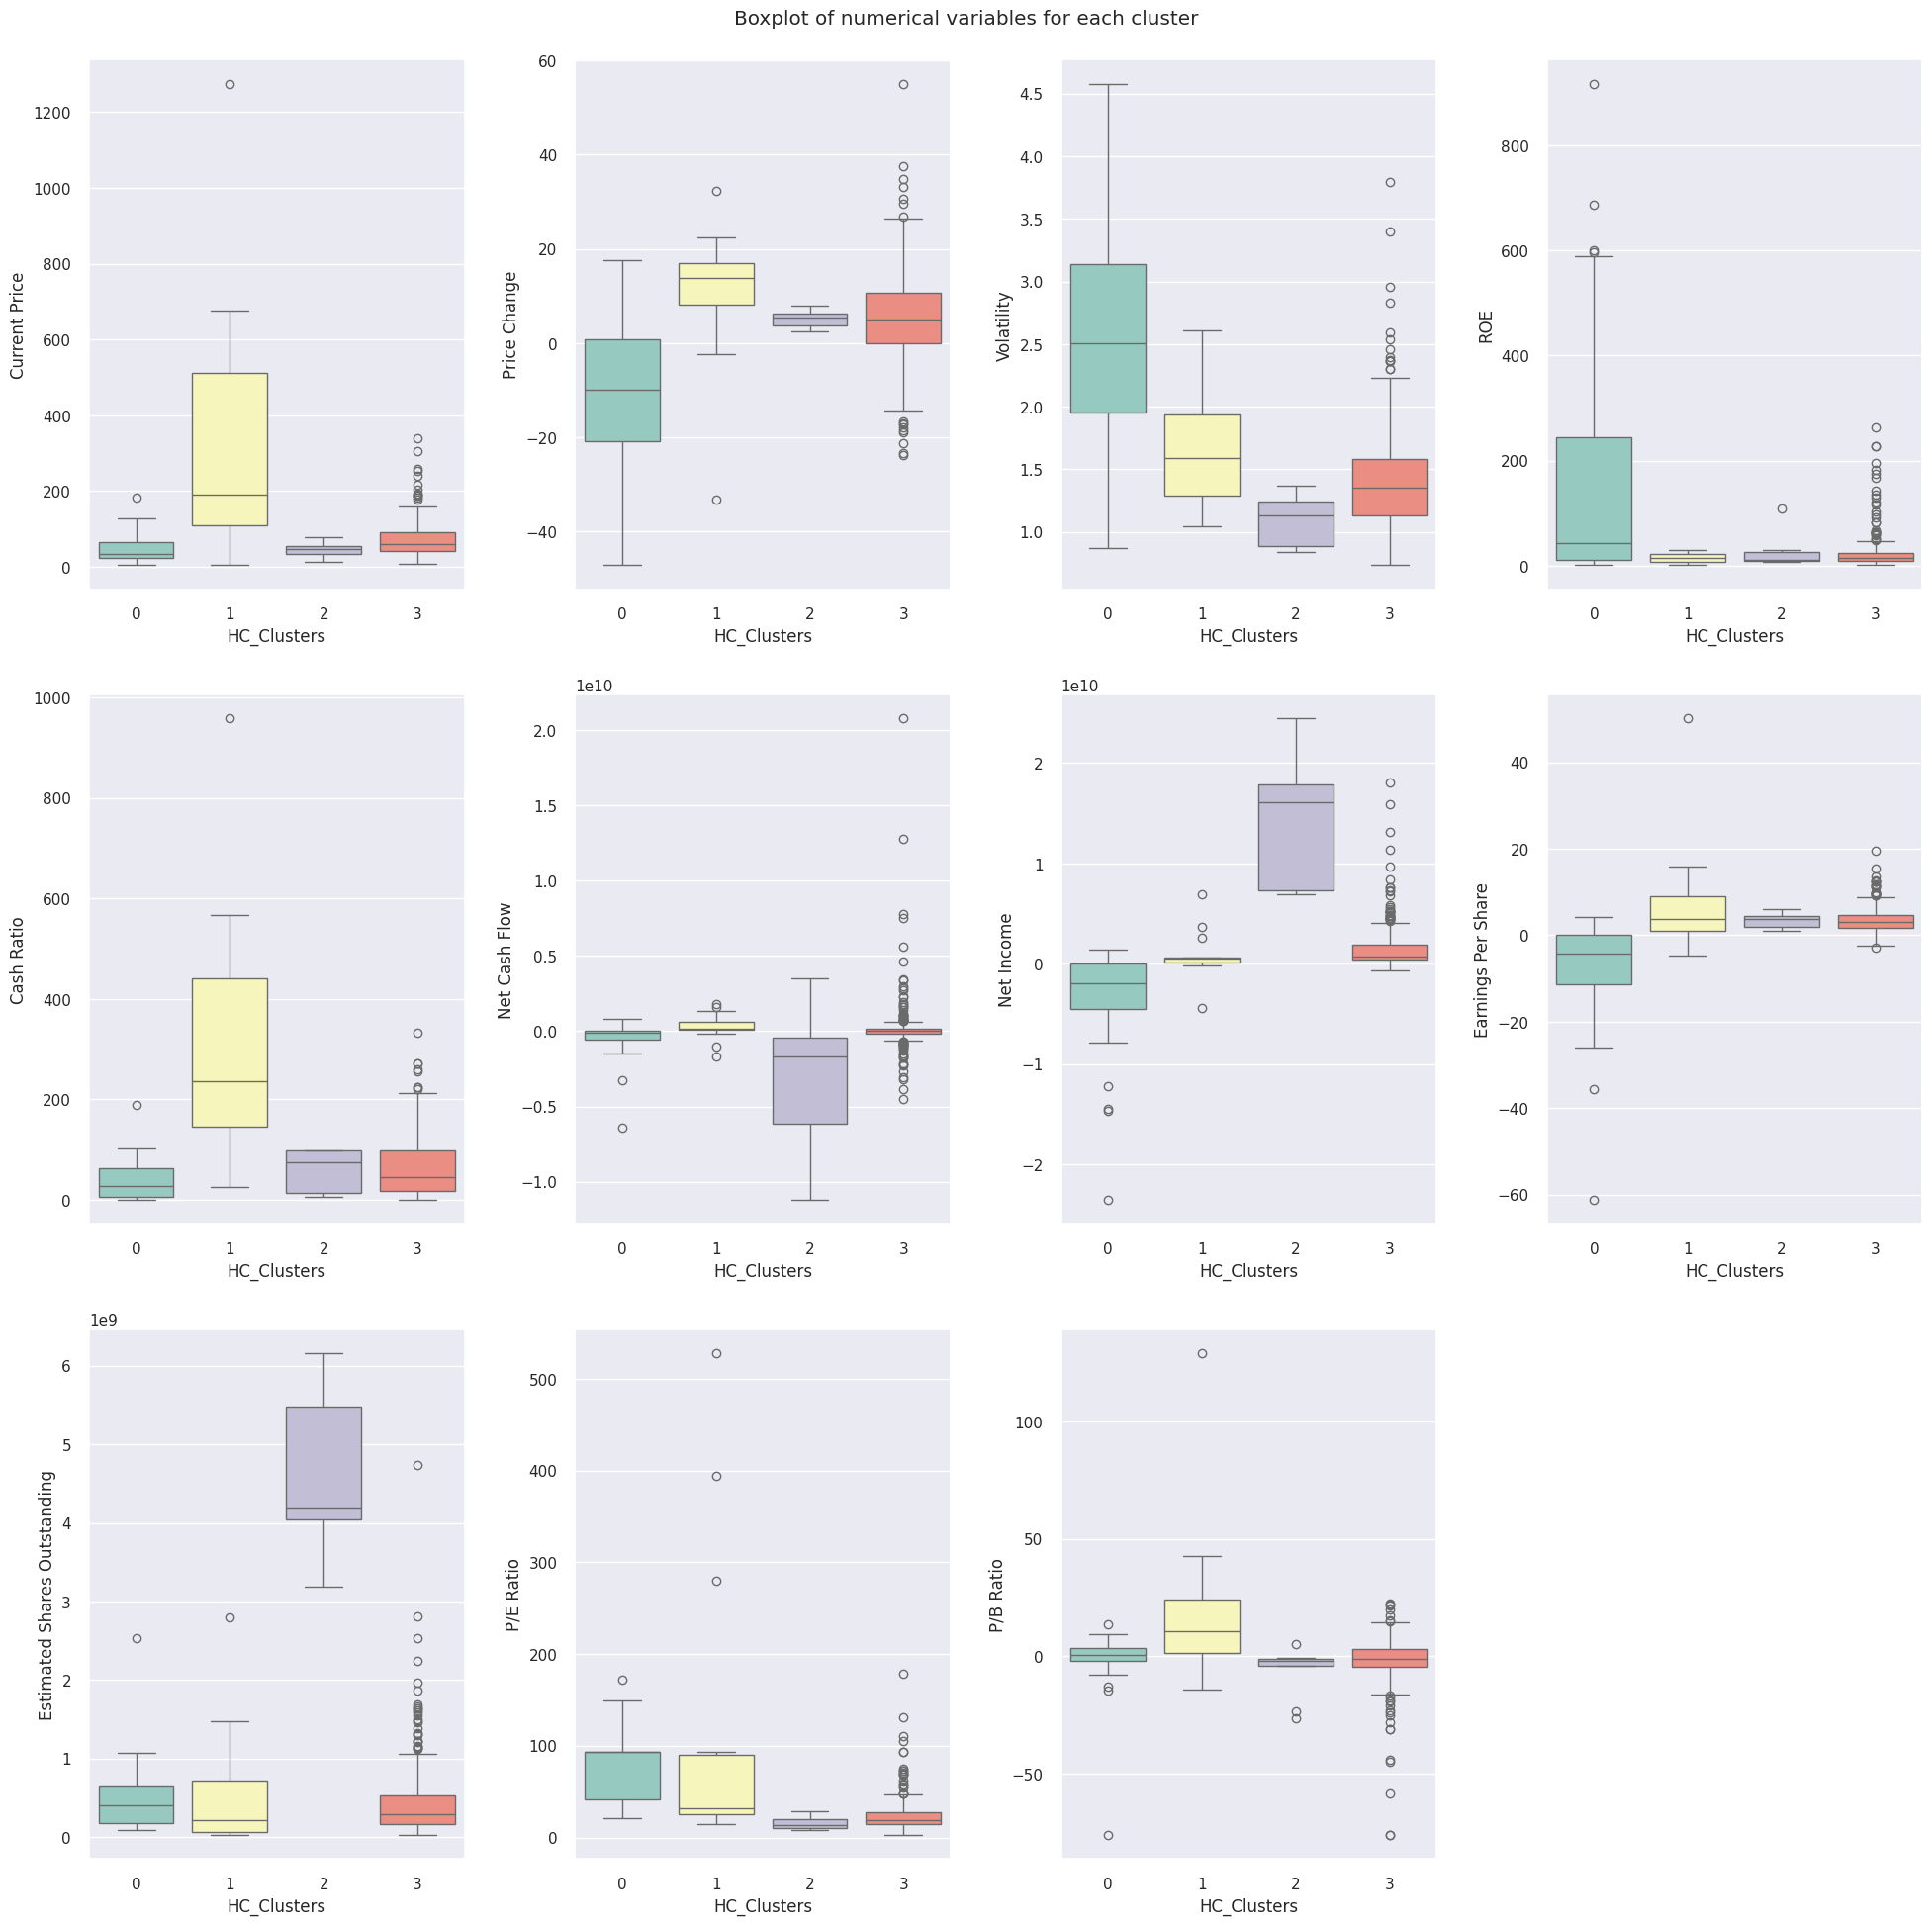

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_Clusters", y=variable,palette='Set3')

plt.tight_layout(pad=2.0)

## Actionable Insights and Recommendations


* Cluster 0 :
    * Companies are the ones who performed poorly in the previous quarter. Most of the companies in this cluster are from the Energy sector, which as a whole performed poorly in the previous quarter. Investors will have to be careful and dig deeper into the financial statements of these companies for a better analysis.

* Cluster 1:
    * Companies have highly-priced stocks and have shown the most growth in the previous quarter. Large proportions of stocks in this cluster are from Healthcare and IT sectors. The high earnings per share also indicate that these stocks will justify their high price tag with good returns. The high P/E ratio indicates that these stocks are either overvalued or investors expect good growth potential from these companies.

* Cluster 2:
    * Companies are the ones which have a low price and have had a great previous quarter. They are less riskier investments and are traded in large volumes. The low P/E ratio might also indicate that these stocks are undervalued, but we will have to dig deeper to conclude the same with confidence.

* Cluster 3:
    * company stocks are moderately priced and are less volatile. They had a good previous quarter and their stocks are traded in moderate volumes. The moderate earnings per share also indicate that these stocks will yield good returns.
    

* Trade&Ahead should look into more finandial (fundamental and technical) indicators to make better predictions of stock price movements and assessment of company valuation.

* They should also conduct cluster analysis separately for each of the economic sectors as it will help them to provide better investment recommendations to their clients